# Linear Regression using TensorFlow

# Read the data first

In [1]:
# !pip install tensorflow-probability
# !pip install tensorflow

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

data = pd.read_csv("Dataset/LinearRegression/Units_Sold_ProfitPct.csv")
data

,UnitSold_in_1000,Profits_Pct
0,0.54,3.69
1,0.72,4.58
2,0.60,4.03
3,0.54,3.67
4,0.42,3.40
5,0.64,4.03
6,0.43,3.76
7,0.89,4.61
8,0.96,4.98
9,0.38,2.89


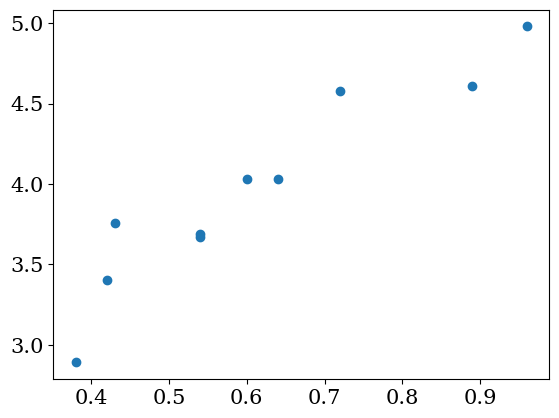

In [60]:
plt.scatter(data['UnitSold_in_1000'], data['Profits_Pct'])

# Convert the data into Tensfor for using with Tensorflow

In [63]:

# Convert to TensorFlow tensors
x = tf.constant(data['UnitSold_in_1000'].to_numpy(), dtype=tf.float32)
y = tf.constant(data['Profits_Pct'].to_numpy(), dtype=tf.float32)


# Define the Model

In [64]:
# Initialize weights
w_0 = tf.Variable(0.0)
w_1 = tf.Variable(0.0)

# Define the Linear Regression model
def model(X):
    return w_1 * X + w_0

# Define the Cost Function/Loss Function

In [65]:

# Define the loss function (mean squared error)
def loss_fn(Y_hat, Y):
    # tf.reduce_mean calculates the mean of the argument vector
    return tf.reduce_mean(tf.square(Y_hat - Y))

lambda_reg = 0.01

# Define the regularization factors
lambda_l1 = 0.01
lambda_l2 = 0.01


# L2 Regularization Loss Function

In [66]:
def loss_fn_L2(Y_hat, Y):
    # tf.reduce_mean calculates the mean of the argument vector
    mse = tf.reduce_mean(tf.square(Y_hat - Y))
    l2_reg = lambda_reg * (tf.square(w_0) + tf.square(w_1))
    return mse + l2_reg

# L1 Regularization
# def loss_fn(Y_hat, Y):
#     # tf.reduce_mean calculates the mean of the argument vector
#     mse = tf.reduce_mean(tf.square(Y_hat - Y))
#     l1_reg = lambda_reg * (tf.abs(w_0) + tf.abs(w_1))
#     return mse + l1_reg

# def loss_fn(Y_hat, Y):
#     # tf.reduce_mean calculates the mean of the argument vector
#     mse = tf.reduce_mean(tf.square(Y_hat - Y))
#     l1_reg = lambda_l1 * (tf.abs(w_0) + tf.abs(w_1))
#     l2_reg = lambda_l2 * (tf.square(w_0) + tf.square(w_1))
#     return mse + l1_reg + l2_reg

# Set the Optimizer

In [70]:
# Define the optimizer
## Here we will use Stochastic Gradient Descent with Learning Rate of 0.001
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# Store the values of loss, w_0, and w_1 for plotting
loss_values = []
w_0_values = []
w_1_values = []

# Training Loop without Regularization

In [71]:

# Training loop
for i in range(1000):
    with tf.GradientTape() as tape:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
    gradients = tape.gradient(loss, [w_0, w_1])
    optimizer.apply_gradients(zip(gradients, [w_0, w_1]))
    loss_values.append(loss.numpy())
    w_0_values.append(w_0.numpy())
    w_1_values.append(w_1.numpy())

# Check Your Results

w_0: 2.7009379863739014, w_1: 1.7842599153518677


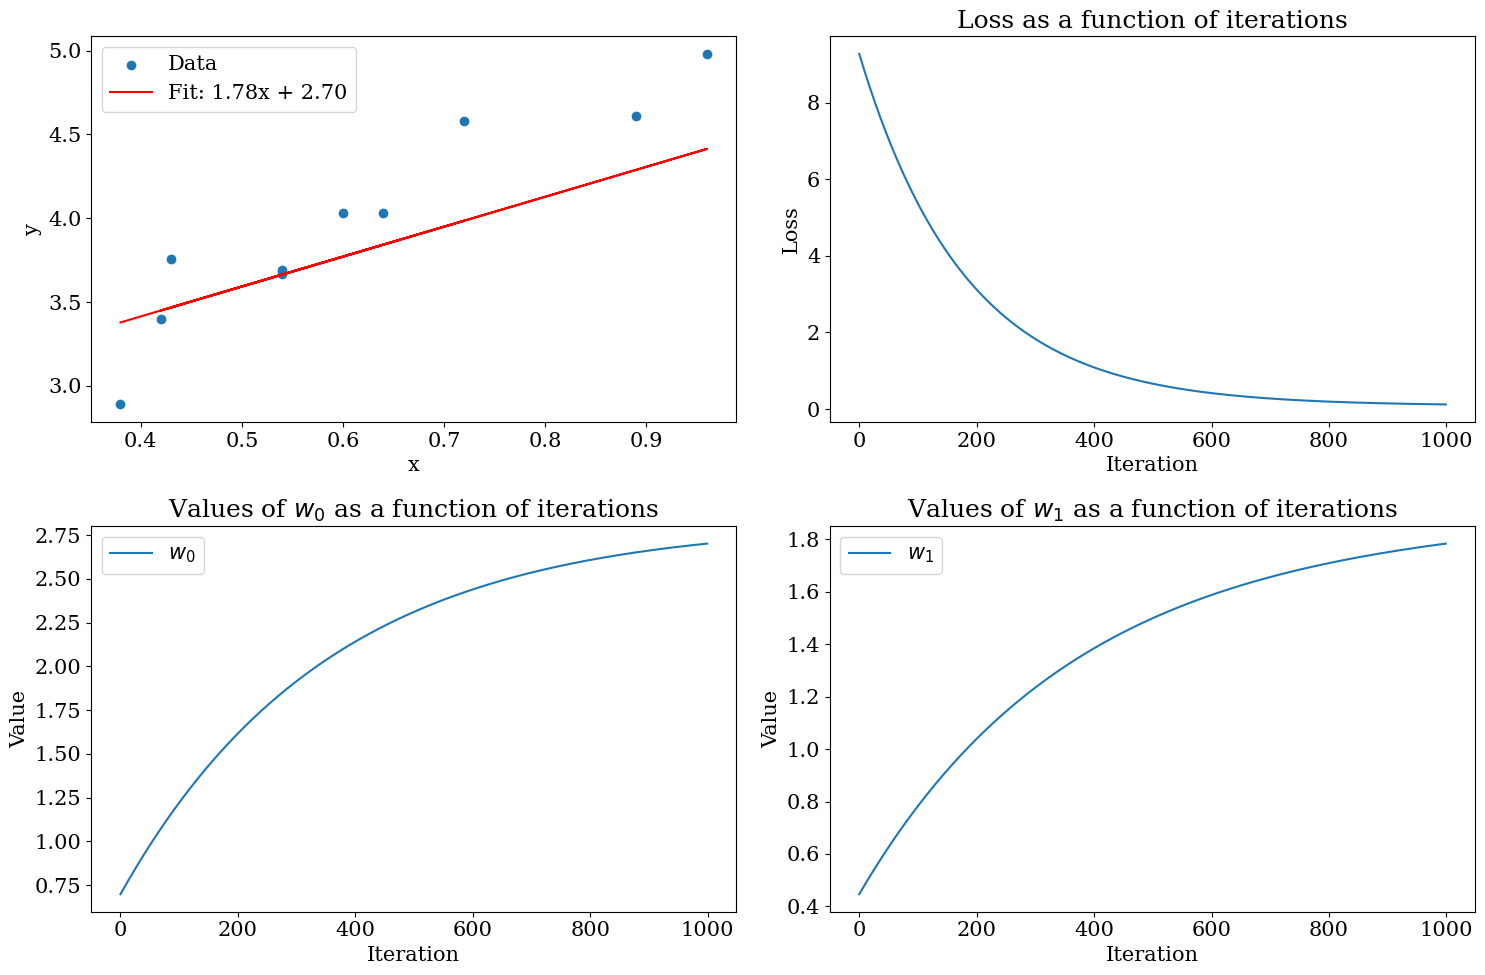

In [72]:


# Print the learned parameters
print(f"w_0: {w_0.numpy()}, w_1: {w_1.numpy()}")

# Plot the data and the learned line
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(x, y, label='Data')
plt.plot(x, model(x), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot the loss as a function of iterations
plt.subplot(2, 2, 2)
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')

# Plot the values of w_0 and w_1 as a function of iterations
plt.subplot(2, 2, 3)
plt.plot(w_0_values, label='$w_0$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_0$ as a function of iterations')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(w_1_values, label='$w_1$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_1$ as a function of iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Training with L2 Regularizaion


In [73]:
# Initialize weights
w_0 = tf.Variable(0.0)
w_1 = tf.Variable(0.0)

In [74]:
# Define the optimizer
## Here we will use Stochastic Gradient Descent with Learning Rate of 0.001
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# Store the values of loss, w_0, and w_1 for plotting
loss_values = []
w_0_values = []
w_1_values = []

# Notice that I am using `loss_fn_L2`

In [75]:

# Training loop
for i in range(1000):
    with tf.GradientTape() as tape:
        y_hat = model(x)
        loss = loss_fn_L2(y_hat, y)
    gradients = tape.gradient(loss, [w_0, w_1])
    optimizer.apply_gradients(zip(gradients, [w_0, w_1]))
    loss_values.append(loss.numpy())
    w_0_values.append(w_0.numpy())
    w_1_values.append(w_1.numpy())

w_0: 2.645536184310913, w_1: 1.7407947778701782


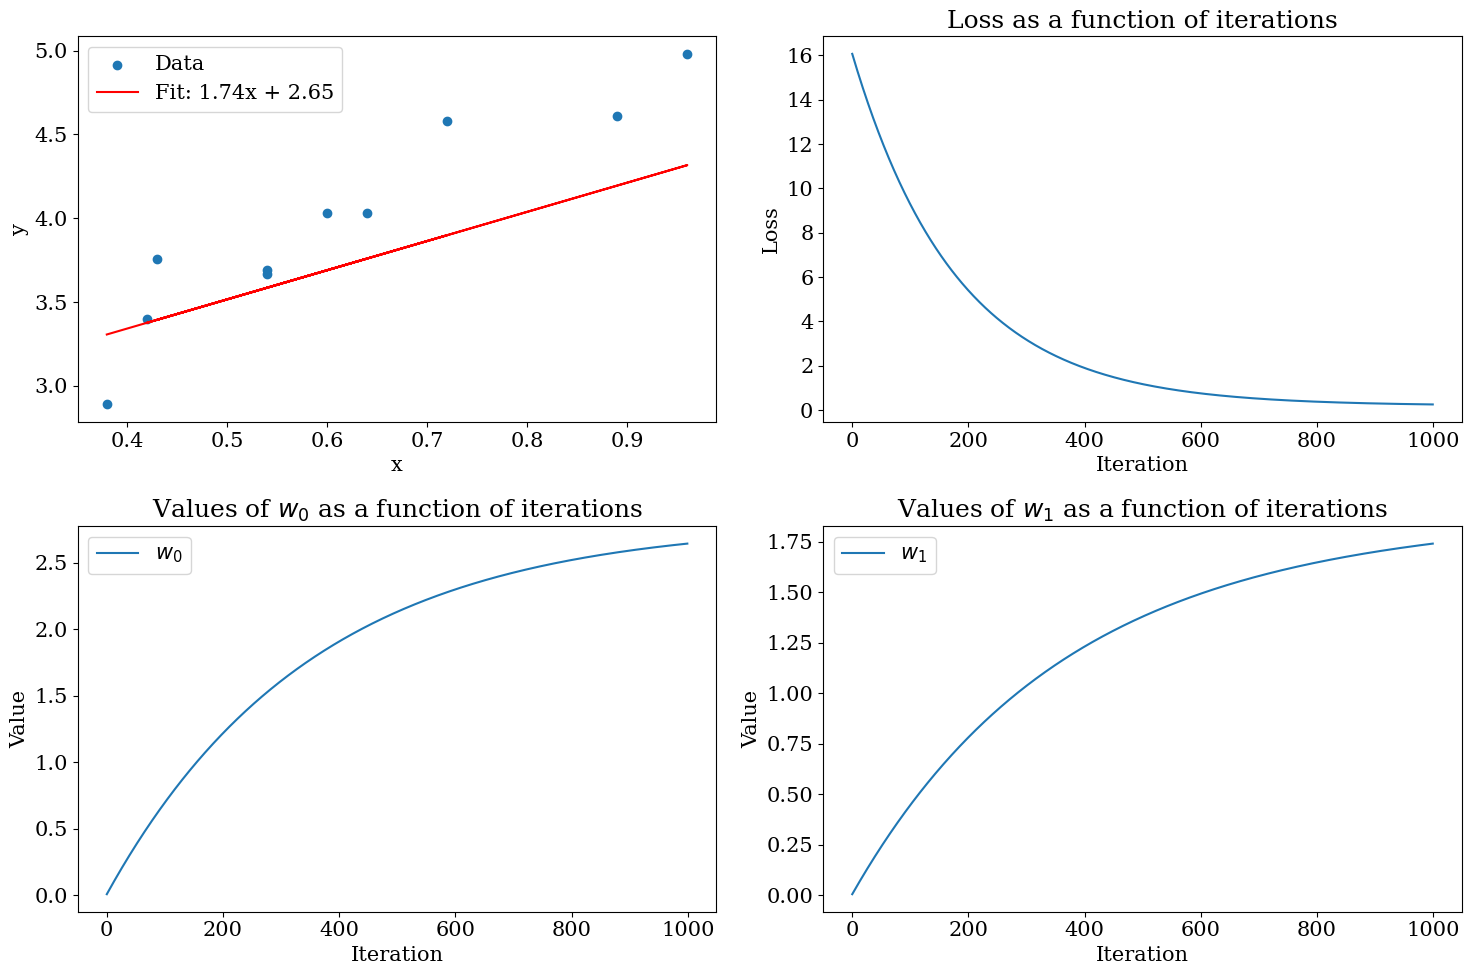

In [76]:


# Print the learned parameters
print(f"w_0: {w_0.numpy()}, w_1: {w_1.numpy()}")

# Plot the data and the learned line
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(x, y, label='Data')
plt.plot(x, model(x), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot the loss as a function of iterations
plt.subplot(2, 2, 2)
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')

# Plot the values of w_0 and w_1 as a function of iterations
plt.subplot(2, 2, 3)
plt.plot(w_0_values, label='$w_0$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_0$ as a function of iterations')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(w_1_values, label='$w_1$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_1$ as a function of iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Note: Of course this is just a demonstration, in large dataset, you will be first splitting the dataset into training and test dataset and then evaluate model on the test dataset for accuracy percentage